# Chapter 3: Undirected graphs

**Simon Plovyt, 01204786, Master in Bioinformatics: Bioscience Engineering**

*Selected Topics in Mathematical Optimization*

*2016-2017*

**Bernard De Baets**

**Michiel Stock**

**Raúl Pérez-Fernández**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial import voronoi_plot_2d, Voronoi
import numpy as np
%matplotlib inline

## Some essential data structures in python

Using the correct datastructure is key to implementing an efficient graph algorithm. Below is a concise overview of some elementary python data structures.

For more information on the time complexity of operations on these data structures, see [this](https://wiki.python.org/moin/TimeComplexity) link.

### Lists: ordered  collection of objects

Lists store objects in sequential order. Adding and removing elements at the back is easy, inserting or removing elements elsewhere is computationally inefficient (memory has to be reshuffled).

In [2]:
my_list = [1, 2, 3, 4, 5]

In [3]:
my_list.append(6)  # add element at the back
my_list

[1, 2, 3, 4, 5, 6]

In [4]:
my_list.pop()  # return last element

6

In [5]:
my_list  # element is gone

[1, 2, 3, 4, 5]

In [6]:
my_list[4]  # take element

5

In [7]:
my_list[3] = 'three'  # replace
my_list

[1, 2, 3, 'three', 5]

In [8]:
# for loops in lists
squares = [x**2 for x in range(1, 11)]
squares

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [9]:
# a more complex example
squares_odd = [x**2 for x in range(1, 11) if x%2==1]
squares_odd

[1, 9, 25, 49, 81]

### Sets: unordened collection of objects

Sets have no ordening and cannot contain duplicates. It is very efficient (constant time complexity = independent of set size) to check if an element is present and to add or remove an object.

In [10]:
numbers = set([1, 2, 15, -1, 4, 2, 3, 4])  # make set from list 
numbers  # no particular order or duplicates

{-1, 1, 2, 3, 4, 15}

In [11]:
5 in numbers  # check if element is member

False

In [12]:
numbers.add(5)  # add element

In [13]:
5 in numbers

True

In [14]:
# set operations on two sets
new_numbers = set([2, 15, -1, 8, 6, 15])
new_numbers

{-1, 2, 6, 8, 15}

In [15]:
numbers & new_numbers  # intersection (AND)

{-1, 2, 15}

In [16]:
numbers | new_numbers  # union (OR)

{-1, 1, 2, 3, 4, 5, 6, 8, 15}

In [17]:
numbers - new_numbers  # set difference (in first but not in second)

{1, 3, 4, 5}

## Dictionary: key-value storage

Dictionaries are the best of both lists and sets, they store values by a key

In [18]:
my_dict = {'A' : 1, 'B' : 'bee', 'C' : [1, 2, 3]}  # make dictionary

In [19]:
my_dict['B']  # get value associated by key

'bee'

In [20]:
my_dict['D'] = 'new value'  # add new key-value
my_dict

{'A': 1, 'B': 'bee', 'C': [1, 2, 3], 'D': 'new value'}

In [21]:
'A' in my_dict  # check if dict has key, similar to set -> efficient

True

In [22]:
for k, v in my_dict.items():  # iterate over values
    print(k, v)

C [1, 2, 3]
A 1
B bee
D new value


In [23]:
for k in my_dict.keys():  # iterate over keys
    print(k)

C
A
B
D


In [24]:
for v in my_dict.values():  # iterate over values
    print(v)

[1, 2, 3]
1
bee
new value


## Representing graphs in python

Consider the following example graph:

Typically, graphs are represented as:
- **list of edges**: a set of edges (tuples of vertices) we use sets are there is no order in the edges. THis is the prefered format to *store* graphs.
- **adjacency lists**: in python implemented as dictionaries. Each vertex is a key and the associated value is a set of neighboring edges (for undirected graphs every outgoing edge should be balanced by an ingoing edge).
- **adjacenty matrices**: matrix of which the elements store the edges. Is only used for dense graphs.

Example of the theory:

![](Figures/undir_graph.png)

In [25]:
edges = set([('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'D'), ('C', 'E'), ('D', 'E')])

In [26]:
from graphs import edges_to_adj_list

In [27]:
adj_list = edges_to_adj_list(edges)
adj_list

{'A': {'B', 'D'},
 'B': {'A', 'C'},
 'C': {'B', 'D', 'E'},
 'D': {'A', 'C', 'E'},
 'E': {'C', 'D'}}

Some basic graph algorithms are implemented:
- `give_connected_component`: gives the largest connected component for a vertex
- `is_connected`: checks if a graph is connected (every edge can be reached from every other edge)
- `has_path`: checks if there exists a path between two vertices
- `is_bridge`: checks if an edge is a bridge (i.e. removing it makes the graph disconnected

Run the examples and check the result

In [28]:
from graphs import give_connected_component, is_connected, is_bridge, has_path

In [29]:
example1_edges = set([('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'C'), ('D', 'E'),
                     ('E', 'F'), ('F', 'G'), ('G', 'E'), ('D', 'F')
                     ])
example2_edges = set([('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'),
                     ('D', 'G'), ('F', 'G'), ('G', 'E'), ('D', 'F')
                     ])

In [30]:
example1_adj_list = edges_to_adj_list(example1_edges)
example2_adj_list = edges_to_adj_list(example2_edges)

In [31]:
give_connected_component(example1_adj_list, 'A')

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [32]:
give_connected_component(example2_adj_list, 'A')

{'A', 'B', 'C'}

In [33]:
is_connected(example1_adj_list)

True

In [34]:
is_connected(example2_adj_list)

False

In [35]:
is_bridge(example1_adj_list, ('A', 'B'))

False

In [36]:
is_bridge(example1_adj_list, ('C', 'D'))

True

In [37]:
example1_adj_list

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D'},
 'D': {'C', 'E', 'F'},
 'E': {'D', 'F', 'G'},
 'F': {'D', 'E', 'G'},
 'G': {'E', 'F'}}

In [38]:
has_path(example2_adj_list, 'A', 'C')

True

In [39]:
has_path(example2_adj_list, 'A', 'F')

False

## Fleury's algorithm

Fleury's algorithm is a simple (though inefficient algorithm to find an Eulerian trail (i.e. a walk on the graph that passes all the edges).

It can be shown that a graph has an Eulerian trail if and only if it is connected and it it has exactly zero or two edges with an odd degree.

Fleury's algorithm is executed as follows:
1. Start at a vertex of odd degree, or, if the graph has none, start with an arbitrarily chosen vertex.
2. Chooses the next edge in the path to be one whose deletion would not disconnect the graph (i.e. is not a bridge), unless there is no such edge, in which case pick the remaining edge left at the current vertex.
3. Add the edge to the path and remove the edge from the graph.
4. Repeat steps 2-3 until no more edges are left.

**ASSIGNMENT 1**

1. Complete the pseudocode of fleury's algorithm. The algorithm first checks if an Eulerian path exists (and returns None if not) and returns the path as a list. Use the given function `is_bridge` to check if an 
2. Study the time complexity of the algorithm. For this you have 25 graphs at your disposal. These graphs are stored in json format in the form `eulerianxxx.json` with '`xxx`' the number of edges. The function `load_graph` can read this data file (see example). For each file, measure the time to find the Eulerian path and make a graph (in log-log scale) of the time vs. the number of edges. Comment on the relation (linear time complexity, super/sublinear?) Does this make sense? HINT: detecting if an edge is a bridge is done with an average time complexity linear in the number of edges.

In [40]:
def collect_odd_degree_nodes(adj_list):
    odd_degree_nodes = set()
    for node in adj_list:
        if len(adj_list[node])%2==1:
            odd_degree_nodes.update([node])
    return odd_degree_nodes

def fleury_algorithm(adj_list):
    from graphs import adj_list_to_edges
    from graphs import is_bridge
    from graphs import edges_to_adj_list
    """
    Fleury's algorithm for finding an Eulerian path (if one exists)
    
    First it checks if the path exists, if it exists, it returns a list of
    the nodes that are visisted in an Eulerian path
    
    Inputs:
        - adj_list
        
    Outputs:
        - path
    """
    adj_list = {k : v.copy() for k, v in adj_list.items()}  # make a copy
    
    # check if Eulerian path exists
    if is_connected(adj_list):
        odd_degree_nodes = collect_odd_degree_nodes(adj_list)
        if len(odd_degree_nodes) == 0 or len(odd_degree_nodes) == 2:
            
            # extract a node to start with
            if len(odd_degree_nodes) == 0:
                current_node = adj_list.pop()
            else:
                current_node = odd_degree_nodes.pop()
                
            # Now for Fleury's algorithm
            edge_set = adj_list_to_edges(adj_list)
            path = []
            while edge_set != set():
                if len(adj_list[current_node])>1:
                    # if there is more than one choice, pick the non-bridge edge
                    for connected_node in adj_list[current_node]:
                        if not is_bridge(adj_list, (current_node, connected_node)):
                            next_node = connected_node
                            break
                else:
                    next_node = list(adj_list[current_node])[0]
                    
                # add edge to path 
                path.append(current_node)
                
                # and remove edge from graph
                edge_set.remove((current_node, next_node))
                edge_set.remove((next_node, current_node))
                adj_list = edges_to_adj_list(edge_set)
                current_node = next_node
            path.append(next_node)
            return path
        else:
            return None
    else:
        return None

In [41]:
fleury_algorithm(adj_list)

['C', 'E', 'D', 'C', 'B', 'A', 'D']

In [42]:
from graphs import load_graph

In [43]:
# example on how to load the graph
adj_loaded = load_graph('Data_Eulerian/eulerian14.json')
adj_loaded

{'0': {'2', '8'},
 '2': {'0', '3', '5', '6', '8'},
 '3': {'2', '4', '6', '7'},
 '4': {'3', '8'},
 '5': {'2', '6', '7', '8'},
 '6': {'2', '3', '5', '8'},
 '7': {'3', '5'},
 '8': {'0', '2', '4', '5', '6'}}

In [44]:
def time_fleury_algorithm(adj_list):
    if __name__=='__main__':
        from timeit import Timer
        t = Timer(lambda: fleury_algorithm(adj_list))
        time_measured = (t.timeit(number=1))
    return time_measured

In [45]:
# 1. List all .json files
import os
all_files = os.listdir('Data_Eulerian/')
# (remove all non .json files from list)
for file in all_files:
    if '.json' not in file:
        all_files.remove(file)

# 2. Measure time for the amount of edges
from graphs import load_graph
edge_time_dict = dict()
for file in all_files:
    edge_amount = int(file[8:-5])
    adj_list = load_graph('Data_Eulerian/' + file)
    time_measured = time_fleury_algorithm(adj_list)
    edge_time_dict[edge_amount] = time_measured

# 3. Pour into sorted list with edges and corresponding times
edges = sorted(edge_time_dict.keys())
times = []
for i in edges:
    times.append(edge_time_dict[i])

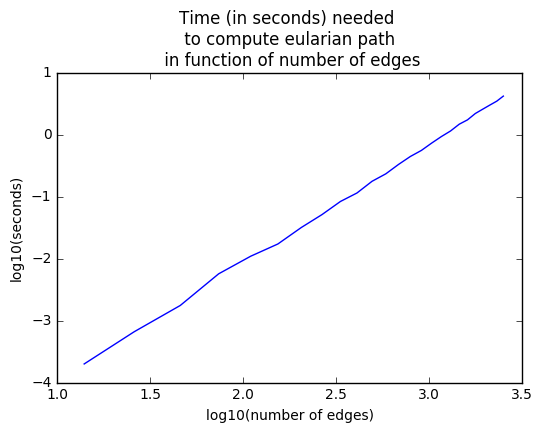

In [46]:
plt.plot(np.log10(edges), np.log10(times))
plt.title('Time (in seconds) needed \n to compute eularian path \n in function of number of edges')
plt.xlabel('log10(number of edges)')
plt.ylabel('log10(seconds)')

** Describe the experimentally observed time complexity **

The time complexity is given by the following equation:

log(time) = log(C) + a * log(n)

Thus, a line should be observed on a log-log plot, which is indeed the case. The slope of the line is informative about the degree of the polynomial problem. 

At first sight, Fleury's algorithm seems to move through the graph in linear fashion for the number of edges, i.e. O(|E|). However, as the hint above suggests, we are also required to factor in the complexity of detecting bridges. Detecting if an edge is a bridge is done with an average time complexity linear in the number of edges. This would result in a time complexity of O(|E|^2). The degree of 2 could also be derived using the slope in the graph.
Given the reasoning above, the observation does indeed make sense.

## Graph coloring using six colors

Graph coloring is an optimization problem of assinging a color to each label using as few colors as possible such that no neighboring vertices have the same color.

The four color theorem states that a planar graph can be colored using only four colors.

We will use six colors (though we rarely need more than five) to color a planar graph. For this, the algorithm is very simple:

1. Color recursively with the six colors all vertices of degree five or more.
2. Color the rest of the graph with a free color.

**ASSIGNMENT 2**

1. Complete the graph coloring algorithm.
2. What do you think the time complexity of this algorithm is going to be (based on reasoning).

You can illustrate this algorithm on a Voronoi plot (a tesselation of a plane based on the distance to a set of points). Feel free to improve the graphics :-)

In [47]:
def graph_color(adj_list, colors=['k', 'r', 'b', 'g', 'y', 'm']):
    """
    Provides one of six colors for each vertex in a planar graph
    such that no neighboring vertices have the same color
    
    Inputs:
        - adj_list: adjecency list of a planar graph
        - colors: list of six colors (default those for matplotlib plotting)
        
    Output: 
        - vertices_colors: a dict with a color (value) for each vertex (key)
    """
    vertices_colors = {}
    
    # Collect all nodes with degree of five and more
    degrees_of_five = set()
    for node in adj_list:
        if len(adj_list[node])>=5:
            degrees_of_five.update([node])
            
    # Color these nodes with degree of 5
    for node in degrees_of_five:
        remaining_colors = colors.copy()
        # check if the neighbours are colored
        for neighbour in adj_list[node]:
            if neighbour in vertices_colors:
                if vertices_colors[neighbour] in remaining_colors:
                    remaining_colors.remove(vertices_colors[neighbour])
        # give one of the remaining colors to the node
        vertices_colors[node] = remaining_colors[0]
    
    # Color other nodes
    for node in adj_list:
        if node not in vertices_colors: # if not yet colored
            remaining_colors = colors.copy()
            # check if the neighbours are colored
            for neighbour in adj_list[node]:
                if neighbour in vertices_colors:
                    if vertices_colors[neighbour] in remaining_colors:
                        remaining_colors.remove(vertices_colors[neighbour])
            # give one of the remaining colors to the node
            vertices_colors[node] = remaining_colors[0]
    return vertices_colors

In [48]:
from graphs import get_planar_graph

In [49]:
X = np.random.randn(20, 2)  # random points for Voronoi tesselation
planar_graph = get_planar_graph(X)

In [50]:
planar_graph

{0: {1, 3, 4, 15, 16, 19},
 1: {0, 6, 8, 16, 18, 19},
 2: {7, 13, 14, 17},
 3: {0, 4, 16, 18},
 4: {0, 3, 9, 15, 18},
 5: {9, 11, 13, 14},
 6: {1, 8, 12, 17},
 7: {2, 10, 12, 14, 17},
 8: {1, 6, 10, 12, 19},
 9: {4, 5, 11, 15, 18},
 10: {7, 8, 12, 14, 19},
 11: {5, 9, 14, 15},
 12: {6, 7, 8, 10, 17},
 13: {2, 5, 14, 17},
 14: {2, 5, 7, 10, 11, 13, 15, 19},
 15: {0, 4, 9, 11, 14, 19},
 16: {0, 1, 3, 18},
 17: {2, 6, 7, 12, 13},
 18: {1, 3, 4, 9, 16},
 19: {0, 1, 8, 10, 14, 15}}

In [51]:
coloring = graph_color(planar_graph, colors=['k', 'r', 'b', 'g', 'y', 'm'])
coloring

{0: 'k',
 1: 'r',
 2: 'g',
 3: 'g',
 4: 'r',
 5: 'r',
 6: 'g',
 7: 'k',
 8: 'k',
 9: 'k',
 10: 'r',
 11: 'y',
 12: 'b',
 13: 'k',
 14: 'b',
 15: 'g',
 16: 'y',
 17: 'r',
 18: 'b',
 19: 'y'}

In [52]:
# Source for the following code: Stackoverflow
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.
    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.
    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()
    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))
    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue
        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue
            # Compute the missing endpoint of an infinite ridge
            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal
            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius
            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())
        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]
        # finish
        new_regions.append(new_region.tolist())
    return new_regions, np.asarray(new_vertices)

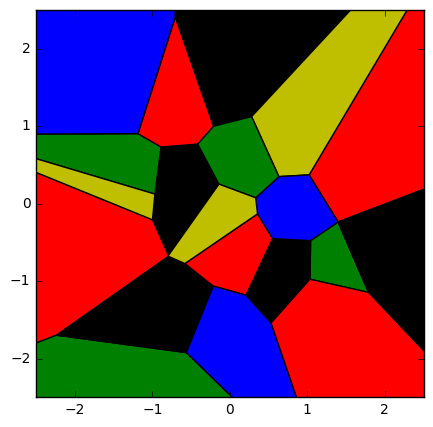

In [53]:
from matplotlib.patches import Polygon
import matplotlib.path as mplPath

vor = Voronoi(X)
newregion, newvertex = voronoi_finite_polygons_2d(vor, radius=None)

plt.figure(figsize=(5,5))
plt.axis([-2.5,2.5,-2.5,2.5])
axes = plt.gca()
for i in newregion:
   verlist = []
   for j in i:
       ver = newvertex[j]
       verlist.append(ver)
   reg = mplPath.Path(np.array(verlist))
   for k in range(0, len(X)):
       if reg.contains_point((X[k])):
           axes.add_patch(Polygon(np.array(verlist), closed=True, facecolor=coloring[k]))

** What do you think the time complexity of this algorithm is going to be (based on reasoning). **

The graph coloring algorithm consists of three stages:

1) for loop for every node

2) for loop for every node with a nested for loop for every neighbour of the node

3) for loop for every node with a nested for loop for every neighbour of the node


Adding this together results in:

2 \* (loop for every node \* for its neighbours) + 1 \* (loop for every node)

In terms of complexity this results in:

(loop for every node \* for its neighbours)

If the number of neighbours increases superlinear to the number of nodes, the complexity will be bigger than O(|E|^2)

If the number of neighbours increases sublinear to the number of nodes, the complexity will be smaller than O(|E|^2)

If the number of neighbours increases linear to the number of nodes, the complexity will be about equal to O(|E|^2)